# **Import Library yang dibutuhkan**

In [1]:
# Mengimport Library yang dibutuhkan

import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

# Import Library yang dibutuhkan

from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler, TomekLinks, ClusterCentroids
from imblearn.combine import SMOTEENN, SMOTETomek
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.exceptions import NotFittedError

# **Load Dataset**

In [2]:
# Load Dataset

df = pd.read_csv("/content/drive/MyDrive/Dataset Ulasan Google Play/scrapped_data_duolingo_v1.csv")
df.head()


,userName,at,content
0,princess lili,2024-10-28 02:46:18,sangat mudah dan sangat luar biasa untuk di pe...
1,Yuhastiar,2024-10-28 02:44:26,aplikasi yg sangat bagus dan banyak membantu
2,Suqainah Mamang,2024-10-28 02:38:35,BAGUS BANGET. AKU YANG AWALNYA PINTER BAHASA I...
3,Satria Bima,2024-10-28 02:36:26,👍🏻👍🏻👍🏻👍🏻ok banget
4,Muhammad Rifki,2024-10-28 02:23:31,bagús membantu bgtt gambang mengingat bhs atau...


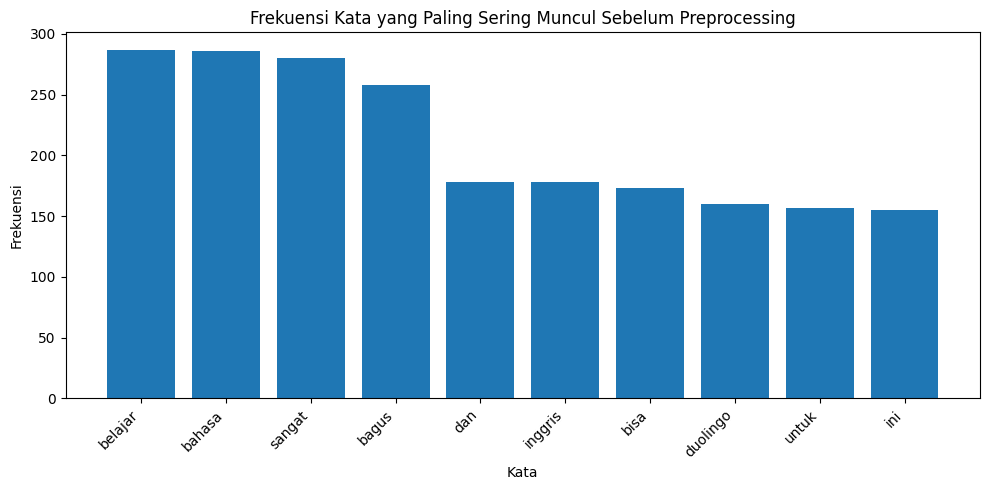

In [3]:
# Frekuensi Kata yang Paling Sering Muncul Sebelum Preprocessing

from collections import Counter

# Gabungkan semua teks ulasan menjadi satu string
all_text = ' '.join(df['content'].astype(str).tolist())

# Hapus karakter non-alfanumerik dan ubah menjadi huruf kecil
all_text = re.sub(r'[^a-zA-Z0-9\s]', '', all_text).lower()

# Pisahkan teks menjadi kata-kata
words = all_text.split()

# Hitung frekuensi kemunculan setiap kata
word_counts = Counter(words)

# Ambil 10 kata yang paling sering muncul
most_common_words = word_counts.most_common(10)

# Buat bar chart
words, counts = zip(*most_common_words)
plt.figure(figsize=(10, 5))
plt.bar(words, counts)
plt.xlabel('Kata')
plt.ylabel('Frekuensi')
plt.title('Frekuensi Kata yang Paling Sering Muncul Sebelum Preprocessing')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [4]:
# Menampilkan Column Content, Username, dan at.

df = df[['content']]
df

,content
0,sangat mudah dan sangat luar biasa untuk di pe...
1,aplikasi yg sangat bagus dan banyak membantu
2,BAGUS BANGET. AKU YANG AWALNYA PINTER BAHASA I...
3,👍🏻👍🏻👍🏻👍🏻ok banget
4,bagús membantu bgtt gambang mengingat bhs atau...
...,...
995,sangat bagus dan mengasah otak
996,bagus sekali sangat membantu dalam belajar bah...
997,good👍
998,keren


In [5]:
# Memberikan Informasi terkait Dataset yang digunakan

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  1000 non-null   object
dtypes: object(1)
memory usage: 7.9+ KB


In [6]:
# Menghasilkan statistik deskriptif data dalam Pandas DataFrame atau Series.

df.describe()


,content
count,1000
unique,897
top,bagus
freq,14


# **Pre - Processing**


1.   Cleaning Data
2.   Case Folding
3.   Normalization
4.   Stopword
5.   Tokenize
6.   Stemming
7.   Translate
8.   Labeling

## **Cleaning Data & Case Folding**

In [7]:
# Mengetahui jumlah berapa baris dan kolom.

df.shape

(1000, 1)

In [8]:
# Menghapus data yang duplicate

df = df.drop_duplicates(subset=['content'])

In [9]:
# Mengecek data yang duplikat

df.duplicated().sum()

0

In [10]:
# Menghapus data yang kosong

df = df.dropna()

In [11]:
# Memastikan tidak ada missing value yang tersisa.

df.isnull().sum()

,0
content,0


In [12]:
# Mengetahui jumlah berapa baris dan kolom setelahnya

df.shape

(897, 1)

In [13]:
# Fungsi Cleaning Text

def clean_review_text(text): # Membuat Fungsi Cleaning Text
  text = re.sub(r"@[A-Za-z0-9_]+", "", text) # Menghapus Mention
  text = re.sub(r"#\w+", "", text) # Menghapus Hastag
  text = re.sub(r"https?://\S+", "", text) # Menghapus URL

  text = re.sub(r"[^A-Za-z0-9 ]", "", text) # Menghapus Karakter Non Alphanumeric
  text = re.sub(r"\s+", " ", text).strip() # Menghapus Spasi Berlebih
  text = re.sub(r"[0-9]+", "", text)

  return text

In [14]:
# Fungsi Hapus Emoji

def remove_emojis(data): # Membuat Fungsi Hapus Emoji
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

In [15]:
# Mengaplikasikan Fungsi Cleaning Text, Emoji, dan Case Folding yang sudah dibuat kedalam column 'content'

df['cleaning'] = df['content'].apply(lambda x: clean_review_text(remove_emojis(x))).str.lower()
df

,content,cleaning
0,sangat mudah dan sangat luar biasa untuk di pe...,sangat mudah dan sangat luar biasa untuk di pe...
1,aplikasi yg sangat bagus dan banyak membantu,aplikasi yg sangat bagus dan banyak membantu
2,BAGUS BANGET. AKU YANG AWALNYA PINTER BAHASA I...,bagus banget aku yang awalnya pinter bahasa in...
3,👍🏻👍🏻👍🏻👍🏻ok banget,ok banget
4,bagús membantu bgtt gambang mengingat bhs atau...,bags membantu bgtt gambang mengingat bhs atau ...
...,...,...
994,rawrr,rawrr
995,sangat bagus dan mengasah otak,sangat bagus dan mengasah otak
996,bagus sekali sangat membantu dalam belajar bah...,bagus sekali sangat membantu dalam belajar bah...
997,good👍,good


## **Normalization**

In [16]:
# Normalisasi

norm = {"yg" : "yang",
        "aplk" : "aplikasi",
        "jd" : "jadi",
        "woila" : "",
        "jgn" : "jangan",
        "gajelas" : "tidak jelas",
        "pantes" : "pantas",
        "geratis" : "gratis",
        "doanload" : "download",
        "ngebag" : "ngebug",
        "elor" : "error",
        "grafick" : "grafik",
        "bngt" : "banget",
        "kemare" : "kemarin",
        "dislek" : "dislike",
        "bguss" : "bagus",
        "sakarag" : "sekarang",
        "aflikasi" : "aplikasi",
        "sengkap" : "lengkap",
        "mntapp" : "mantap",
        "lncar" : "lancar",
        "pdhl" : "padahal",
        "gaes" : "guys",
        "kelen" : "kalian",
        "grgr" : "gara gara",
        "mnta" : "minta",
        "pasilitas" : "fasilitas",
        "mantapz" : "mantap",
        "maw" : "mau",
        "ajh" : "aja",
        "bnaget" : "banget",
        "gambang" : "mudah",
        "bhs" : "bahasa"
       }

def normalisasi(str_text):
  for i in norm:
    str_text = str_text.replace(i, norm[i])
  return str_text

df['normalization'] = df['cleaning'].apply(lambda x: normalisasi(x))
df

,content,cleaning,normalization
0,sangat mudah dan sangat luar biasa untuk di pe...,sangat mudah dan sangat luar biasa untuk di pe...,sangat mudah dan sangat luar biasa untuk di pe...
1,aplikasi yg sangat bagus dan banyak membantu,aplikasi yg sangat bagus dan banyak membantu,aplikasi yang sangat bagus dan banyak membantu
2,BAGUS BANGET. AKU YANG AWALNYA PINTER BAHASA I...,bagus banget aku yang awalnya pinter bahasa in...,bagus banget aku yang awalnya pinter bahasa in...
3,👍🏻👍🏻👍🏻👍🏻ok banget,ok banget,ok banget
4,bagús membantu bgtt gambang mengingat bhs atau...,bags membantu bgtt gambang mengingat bhs atau ...,bags membantu bgtt mudah mengingat bahasa atau...
...,...,...,...
994,rawrr,rawrr,rawrr
995,sangat bagus dan mengasah otak,sangat bagus dan mengasah otak,sangat bagus dan mengasah otak
996,bagus sekali sangat membantu dalam belajar bah...,bagus sekali sangat membantu dalam belajar bah...,bagus sekali sangat membantu dalam belajar bah...
997,good👍,good,good


## **Stopwords**

In [17]:
# Menginstall Library Sastrawi

!pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.1 MB/s eta 0:00:00


In [18]:
# Stopwords

import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
more_stop_words = ["dengan", "aku", "engkau", "kamu", "beliau", "kalian", "kita", "sini", "situ", "sana",
                   "begini", "bapak", "ibu", "saudara", "tuan", "nyonya", "nona", "siapa", "apa", "mana",
                   "kapan", "bagaimana", "kini", "dulu", "sekarang", "tadi", "besok", "lusa", "satu",
                   "tiga", "pertama", "kedua", "ketiga", "sangat", "sekali", "terlalu", "cukup", "lah",
                   "tah", "yang", "nya", "untuk", "dan", "di", "ada", "saya", "ini", "banyak", "itu",
                   "gak", "buat", "ke", "ga", "karena", "banget", "hal", "dalam", "amat"]


stop_words = StopWordRemoverFactory().get_stop_words()
new_array = ArrayDictionary(more_stop_words)
stop_words_remover_new = StopWordRemover(new_array)

def stopwords(str_text):
  str_text = stop_words_remover_new.remove(str_text)
  return str_text

df['stopwords'] = df['normalization'].apply(lambda x: stopwords(x))
df

,content,cleaning,normalization,stopwords
0,sangat mudah dan sangat luar biasa untuk di pe...,sangat mudah dan sangat luar biasa untuk di pe...,sangat mudah dan sangat luar biasa untuk di pe...,mudah sangat luar biasa di pelajari
1,aplikasi yg sangat bagus dan banyak membantu,aplikasi yg sangat bagus dan banyak membantu,aplikasi yang sangat bagus dan banyak membantu,aplikasi sangat bagus banyak membantu
2,BAGUS BANGET. AKU YANG AWALNYA PINTER BAHASA I...,bagus banget aku yang awalnya pinter bahasa in...,bagus banget aku yang awalnya pinter bahasa in...,bagus aku awalnya pinter bahasa inggris jadi t...
3,👍🏻👍🏻👍🏻👍🏻ok banget,ok banget,ok banget,ok
4,bagús membantu bgtt gambang mengingat bhs atau...,bags membantu bgtt gambang mengingat bhs atau ...,bags membantu bgtt mudah mengingat bahasa atau...,bags membantu bgtt mudah mengingat bahasa atau...
...,...,...,...,...
994,rawrr,rawrr,rawrr,rawrr
995,sangat bagus dan mengasah otak,sangat bagus dan mengasah otak,sangat bagus dan mengasah otak,bagus mengasah otak
996,bagus sekali sangat membantu dalam belajar bah...,bagus sekali sangat membantu dalam belajar bah...,bagus sekali sangat membantu dalam belajar bah...,bagus sangat membantu belajar bahasa inggris a...
997,good👍,good,good,good


## **Tokenize**

In [19]:
# Tokenize

df['tokenized'] = df['stopwords'].apply(lambda x:x.split())
df

,content,cleaning,normalization,stopwords,tokenized
0,sangat mudah dan sangat luar biasa untuk di pe...,sangat mudah dan sangat luar biasa untuk di pe...,sangat mudah dan sangat luar biasa untuk di pe...,mudah sangat luar biasa di pelajari,"[mudah, sangat, luar, biasa, di, pelajari]"
1,aplikasi yg sangat bagus dan banyak membantu,aplikasi yg sangat bagus dan banyak membantu,aplikasi yang sangat bagus dan banyak membantu,aplikasi sangat bagus banyak membantu,"[aplikasi, sangat, bagus, banyak, membantu]"
2,BAGUS BANGET. AKU YANG AWALNYA PINTER BAHASA I...,bagus banget aku yang awalnya pinter bahasa in...,bagus banget aku yang awalnya pinter bahasa in...,bagus aku awalnya pinter bahasa inggris jadi t...,"[bagus, aku, awalnya, pinter, bahasa, inggris,..."
3,👍🏻👍🏻👍🏻👍🏻ok banget,ok banget,ok banget,ok,[ok]
4,bagús membantu bgtt gambang mengingat bhs atau...,bags membantu bgtt gambang mengingat bhs atau ...,bags membantu bgtt mudah mengingat bahasa atau...,bags membantu bgtt mudah mengingat bahasa atau...,"[bags, membantu, bgtt, mudah, mengingat, bahas..."
...,...,...,...,...,...
994,rawrr,rawrr,rawrr,rawrr,[rawrr]
995,sangat bagus dan mengasah otak,sangat bagus dan mengasah otak,sangat bagus dan mengasah otak,bagus mengasah otak,"[bagus, mengasah, otak]"
996,bagus sekali sangat membantu dalam belajar bah...,bagus sekali sangat membantu dalam belajar bah...,bagus sekali sangat membantu dalam belajar bah...,bagus sangat membantu belajar bahasa inggris a...,"[bagus, sangat, membantu, belajar, bahasa, ing..."
997,good👍,good,good,good,[good]


## **Stemming**

In [20]:
# Steamming

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stemming(tokens):
    return " ".join([stemmer.stem(word) for word in tokens])

df['stemming'] = df['tokenized'].apply(lambda x: stemming(x))

df.to_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_steamming_duolingo_v1.csv', index=False)


In [21]:
df = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_steamming_duolingo_v1.csv', encoding = 'latin1')
df


,content,cleaning,normalization,stopwords,tokenized,stemming
0,sangat mudah dan sangat luar biasa untuk di pe...,sangat mudah dan sangat luar biasa untuk di pe...,sangat mudah dan sangat luar biasa untuk di pe...,mudah sangat luar biasa di pelajari,"['mudah', 'sangat', 'luar', 'biasa', 'di', 'pe...",mudah sangat luar biasa di ajar
1,aplikasi yg sangat bagus dan banyak membantu,aplikasi yg sangat bagus dan banyak membantu,aplikasi yang sangat bagus dan banyak membantu,aplikasi sangat bagus banyak membantu,"['aplikasi', 'sangat', 'bagus', 'banyak', 'mem...",aplikasi sangat bagus banyak bantu
2,BAGUS BANGET. AKU YANG AWALNYA PINTER BAHASA I...,bagus banget aku yang awalnya pinter bahasa in...,bagus banget aku yang awalnya pinter bahasa in...,bagus aku awalnya pinter bahasa inggris jadi t...,"['bagus', 'aku', 'awalnya', 'pinter', 'bahasa'...",bagus aku awal pinter bahasa inggris jadi tamb...
3,ðð»ðð»ðð»ðð»ok banget,ok banget,ok banget,ok,['ok'],ok
4,bagÃºs membantu bgtt gambang mengingat bhs ata...,bags membantu bgtt gambang mengingat bhs atau ...,bags membantu bgtt mudah mengingat bahasa atau...,bags membantu bgtt mudah mengingat bahasa atau...,"['bags', 'membantu', 'bgtt', 'mudah', 'menging...",bags bantu bgtt mudah ingat bahasa atau mtk dl...
...,...,...,...,...,...,...
892,rawrr,rawrr,rawrr,rawrr,['rawrr'],rawrr
893,sangat bagus dan mengasah otak,sangat bagus dan mengasah otak,sangat bagus dan mengasah otak,bagus mengasah otak,"['bagus', 'mengasah', 'otak']",bagus asah otak
894,bagus sekali sangat membantu dalam belajar bah...,bagus sekali sangat membantu dalam belajar bah...,bagus sekali sangat membantu dalam belajar bah...,bagus sangat membantu belajar bahasa inggris a...,"['bagus', 'sangat', 'membantu', 'belajar', 'ba...",bagus sangat bantu ajar bahasa inggris and l l...
895,goodð,good,good,good,['good'],good


# **Data Preparation**

## **Translate**

In [22]:
# Menginstall Library Deep Translator

!pip install deep_translator

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 1.7 MB/s eta 0:00:00


In [25]:
# Imputing NaN Values

df_values = df.ffill()

In [26]:
# Fungsi Translating Menggunakan deep_translator

from deep_translator import GoogleTranslator

def convert_eng(text):
  translator = GoogleTranslator()
  translatation = translator.translate(text, lang_tgt='en', lang_src="id")
  return translatation

df_values['translate'] = df_values['stemming'].apply(convert_eng)

df_values.to_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_duolingo_v1.csv', index=False)


In [27]:
# Load Dataset Hasil Translate

df_values = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_duolingo_v1.csv')
df_values


,content,cleaning,normalization,stopwords,tokenized,stemming,translate
0,sangat mudah dan sangat luar biasa untuk di pe...,sangat mudah dan sangat luar biasa untuk di pe...,sangat mudah dan sangat luar biasa untuk di pe...,mudah sangat luar biasa di pelajari,"['mudah', 'sangat', 'luar', 'biasa', 'di', 'pe...",mudah sangat luar biasa di ajar,very easy to teach
1,aplikasi yg sangat bagus dan banyak membantu,aplikasi yg sangat bagus dan banyak membantu,aplikasi yang sangat bagus dan banyak membantu,aplikasi sangat bagus banyak membantu,"['aplikasi', 'sangat', 'bagus', 'banyak', 'mem...",aplikasi sangat bagus banyak bantu,"very good application, helps a lot"
2,BAGUS BANGET. AKU YANG AWALNYA PINTER BAHASA I...,bagus banget aku yang awalnya pinter bahasa in...,bagus banget aku yang awalnya pinter bahasa in...,bagus aku awalnya pinter bahasa inggris jadi t...,"['bagus', 'aku', 'awalnya', 'pinter', 'bahasa'...",bagus aku awal pinter bahasa inggris jadi tamb...,"good, I was good at English at the beginning, ..."
3,ðð»ðð»ðð»ðð»ok banget,ok banget,ok banget,ok,['ok'],ok,ok
4,bagÃºs membantu bgtt gambang mengingat bhs ata...,bags membantu bgtt gambang mengingat bhs atau ...,bags membantu bgtt mudah mengingat bahasa atau...,bags membantu bgtt mudah mengingat bahasa atau...,"['bags', 'membantu', 'bgtt', 'mudah', 'menging...",bags bantu bgtt mudah ingat bahasa atau mtk dl...,bags really help to remember languages ​​or ma...
...,...,...,...,...,...,...,...
892,rawrr,rawrr,rawrr,rawrr,['rawrr'],rawrr,rawrr
893,sangat bagus dan mengasah otak,sangat bagus dan mengasah otak,sangat bagus dan mengasah otak,bagus mengasah otak,"['bagus', 'mengasah', 'otak']",bagus asah otak,good brain teaser
894,bagus sekali sangat membantu dalam belajar bah...,bagus sekali sangat membantu dalam belajar bah...,bagus sekali sangat membantu dalam belajar bah...,bagus sangat membantu belajar bahasa inggris a...,"['bagus', 'sangat', 'membantu', 'belajar', 'ba...",bagus sangat bantu ajar bahasa inggris and l l...,"very good, very helpful in teaching English an..."
895,goodð,good,good,good,['good'],good,good


## **Labeling**

In [28]:
# Load Dataset Hasil Translate

df_values = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_duolingo_v1.csv')
df_values

,content,cleaning,normalization,stopwords,tokenized,stemming,translate
0,sangat mudah dan sangat luar biasa untuk di pe...,sangat mudah dan sangat luar biasa untuk di pe...,sangat mudah dan sangat luar biasa untuk di pe...,mudah sangat luar biasa di pelajari,"['mudah', 'sangat', 'luar', 'biasa', 'di', 'pe...",mudah sangat luar biasa di ajar,very easy to teach
1,aplikasi yg sangat bagus dan banyak membantu,aplikasi yg sangat bagus dan banyak membantu,aplikasi yang sangat bagus dan banyak membantu,aplikasi sangat bagus banyak membantu,"['aplikasi', 'sangat', 'bagus', 'banyak', 'mem...",aplikasi sangat bagus banyak bantu,"very good application, helps a lot"
2,BAGUS BANGET. AKU YANG AWALNYA PINTER BAHASA I...,bagus banget aku yang awalnya pinter bahasa in...,bagus banget aku yang awalnya pinter bahasa in...,bagus aku awalnya pinter bahasa inggris jadi t...,"['bagus', 'aku', 'awalnya', 'pinter', 'bahasa'...",bagus aku awal pinter bahasa inggris jadi tamb...,"good, I was good at English at the beginning, ..."
3,ðð»ðð»ðð»ðð»ok banget,ok banget,ok banget,ok,['ok'],ok,ok
4,bagÃºs membantu bgtt gambang mengingat bhs ata...,bags membantu bgtt gambang mengingat bhs atau ...,bags membantu bgtt mudah mengingat bahasa atau...,bags membantu bgtt mudah mengingat bahasa atau...,"['bags', 'membantu', 'bgtt', 'mudah', 'menging...",bags bantu bgtt mudah ingat bahasa atau mtk dl...,bags really help to remember languages ​​or ma...
...,...,...,...,...,...,...,...
892,rawrr,rawrr,rawrr,rawrr,['rawrr'],rawrr,rawrr
893,sangat bagus dan mengasah otak,sangat bagus dan mengasah otak,sangat bagus dan mengasah otak,bagus mengasah otak,"['bagus', 'mengasah', 'otak']",bagus asah otak,good brain teaser
894,bagus sekali sangat membantu dalam belajar bah...,bagus sekali sangat membantu dalam belajar bah...,bagus sekali sangat membantu dalam belajar bah...,bagus sangat membantu belajar bahasa inggris a...,"['bagus', 'sangat', 'membantu', 'belajar', 'ba...",bagus sangat bantu ajar bahasa inggris and l l...,"very good, very helpful in teaching English an..."
895,goodð,good,good,good,['good'],good,good


In [30]:
# # Cek nan di df_values

# # Check for NaN values in the 'translate' column of df_values
# nan_count = df_values['translate'].isnull().sum()
# print(f"Number of NaN values in 'translate' column: {nan_count}")

# # You can also check for NaN values in the entire DataFrame:
# nan_count_df = df_values.isnull().sum().sum()
# print(f"Total number of NaN values in the DataFrame: {nan_count_df}")

# # If you want to see the rows with NaN values:
# rows_with_nan = df_values[df_values['translate'].isnull()]
# rows_with_nan

In [31]:
# Menginstall Library Text-Blob, Worldcould

!pip install textblob
!pip install wordcloud

In [32]:
# Labeling With TextBlob

from textblob import TextBlob

label_df = list(df_values['translate'])
polaritas = 0

status = []
total_positif = total_negatif = total_netral = total = 0

for i, data in enumerate(label_df):
    blob = TextBlob(str(data))
    sentiment = blob.sentiment.polarity
    polaritas += sentiment

    if sentiment > 0.0:
        total_positif += 1
        status.append("Positif")
    elif sentiment < 0.0:
        total_negatif += 1
        status.append("Negatif")
    else:
        total_netral += 1
        status.append("Netral")

    total += 1

print(f"Hasil Analisis Data :\nPositif = {total_positif}\nNetral = {total_netral}\nNegatif = {total_negatif}")
print(f"\nTotal Data Seluruhnya : {total}")

Hasil Analisis Data :
Positif = 637
Netral = 185
Negatif = 75

Total Data Seluruhnya : 897


In [35]:
# Melihat Label Sentimen & Polarity

df_values['sentimen'] = status
df_values['polaritas'] = [TextBlob(text).sentiment.polarity for text in df_values['translate']]

df_values.to_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/data_classified_duolingo_v1.csv', index=False)


In [36]:
# Cek Label & Polaritas

df_values = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/data_classified_duolingo_v1.csv')
df_values


,content,cleaning,normalization,stopwords,tokenized,stemming,translate,sentimen,polaritas
0,sangat mudah dan sangat luar biasa untuk di pe...,sangat mudah dan sangat luar biasa untuk di pe...,sangat mudah dan sangat luar biasa untuk di pe...,mudah sangat luar biasa di pelajari,"['mudah', 'sangat', 'luar', 'biasa', 'di', 'pe...",mudah sangat luar biasa di ajar,very easy to teach,Positif,0.563333
1,aplikasi yg sangat bagus dan banyak membantu,aplikasi yg sangat bagus dan banyak membantu,aplikasi yang sangat bagus dan banyak membantu,aplikasi sangat bagus banyak membantu,"['aplikasi', 'sangat', 'bagus', 'banyak', 'mem...",aplikasi sangat bagus banyak bantu,"very good application, helps a lot",Positif,0.910000
2,BAGUS BANGET. AKU YANG AWALNYA PINTER BAHASA I...,bagus banget aku yang awalnya pinter bahasa in...,bagus banget aku yang awalnya pinter bahasa in...,bagus aku awalnya pinter bahasa inggris jadi t...,"['bagus', 'aku', 'awalnya', 'pinter', 'bahasa'...",bagus aku awal pinter bahasa inggris jadi tamb...,"good, I was good at English at the beginning, ...",Positif,0.466667
3,ðð»ðð»ðð»ðð»ok banget,ok banget,ok banget,ok,['ok'],ok,ok,Positif,0.500000
4,bagÃºs membantu bgtt gambang mengingat bhs ata...,bags membantu bgtt gambang mengingat bhs atau ...,bags membantu bgtt mudah mengingat bahasa atau...,bags membantu bgtt mudah mengingat bahasa atau...,"['bags', 'membantu', 'bgtt', 'mudah', 'menging...",bags bantu bgtt mudah ingat bahasa atau mtk dl...,bags really help to remember languages ​​or ma...,Positif,0.011111
...,...,...,...,...,...,...,...,...,...
892,rawrr,rawrr,rawrr,rawrr,['rawrr'],rawrr,rawrr,Netral,0.000000
893,sangat bagus dan mengasah otak,sangat bagus dan mengasah otak,sangat bagus dan mengasah otak,bagus mengasah otak,"['bagus', 'mengasah', 'otak']",bagus asah otak,good brain teaser,Positif,0.700000
894,bagus sekali sangat membantu dalam belajar bah...,bagus sekali sangat membantu dalam belajar bah...,bagus sekali sangat membantu dalam belajar bah...,bagus sangat membantu belajar bahasa inggris a...,"['bagus', 'sangat', 'membantu', 'belajar', 'ba...",bagus sangat bantu ajar bahasa inggris and l l...,"very good, very helpful in teaching English an...",Positif,0.370000
895,goodð,good,good,good,['good'],good,good,Positif,0.700000


## **Splitting Data & TF - IDF**

In [37]:
# Memisahkan data menjadi data latih dan data uji [ Splitting Data ]

X = df_values['translate']
y = df_values['sentimen']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [38]:
# Menggunakan TF - IDF Vectorizer untuk mengubah teks menjadi fitur numerik [ Text Vectorizer ]

vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


# **Implementasi Algoritma & Evaluasi**

## **Implementasi Algoritma Naive Bayes**

In [39]:
# Import Library Warning
import warnings
warnings.filterwarnings('ignore')

In [40]:
# Periksa Jumlah Sampel di Setiap Variabel

print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))


717
180
717
180


In [41]:
# # Selaraskan Jumlah Baris

# X_train = X_train.iloc[:min(len(X_train), len(y_train))]  # Sesuaikan jumlah sampel
# y_train = y_train.iloc[:min(len(X_train), len(y_train))]


In [42]:
# Membangun Model Naive Bayes Classifier

naive_bayes = MultinomialNB()
naive_bayes.fit(X_train_vec, y_train)

MultinomialNB()

In [43]:
y_pred = naive_bayes.predict(X_test_vec)

## **Pengujian Kinerja Model**


1.   Classification Report
2.   Confusion Matrix




In [44]:
# Classification Report

# Evaluasi Model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, target_names = ['Positif', 'Netral','Negatif'])

print("Akurasi Model Naive Bayes : ", accuracy)
print("\nLaporan Klasifikasi :\n", classification_rep)

# Confusion Matrix

from sklearn.metrics import confusion_matrix

cmnb = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print('Confusion matrix\n\n', cmnb)

Akurasi Model Naive Bayes :  0.6888888888888889

Laporan Klasifikasi :
               precision    recall  f1-score   support

     Positif       0.00      0.00      0.00        21
      Netral       1.00      0.08      0.15        38
     Negatif       0.68      1.00      0.81       121

    accuracy                           0.69       180
   macro avg       0.56      0.36      0.32       180
weighted avg       0.67      0.69      0.58       180

Confusion matrix

 [[  0   0  21]
 [  0   3  35]
 [  0   0 121]]


In [59]:
# Membangun Model SVM

from sklearn.svm import SVC

# Membangun Model SVM Classifier
svm_model = SVC(kernel='linear')  # Anda dapat mengubah kernel jika diperlukan (linear, rbf, poly, dll.)
svm_model.fit(X_train_vec, y_train)
y_pred_svm = svm_model.predict(X_test_vec)

# Evaluasi Model SVM
accuracy_svm = accuracy_score(y_test, y_pred_svm)
cmsvm = confusion_matrix(y_test, y_pred_svm)

print("Akurasi SVM:", accuracy_svm)
print("\nLaporan Klasifikasi :\n", classification_report(y_test, y_pred_svm))
print('Confusion matrix\n\n', cmsvm)

Akurasi SVM: 0.8388888888888889

Laporan Klasifikasi :
               precision    recall  f1-score   support

     Negatif       1.00      0.19      0.32        21
      Netral       0.85      0.76      0.81        38
     Positif       0.83      0.98      0.90       121

    accuracy                           0.84       180
   macro avg       0.89      0.64      0.67       180
weighted avg       0.86      0.84      0.81       180

Confusion matrix

 [[  4   2  15]
 [  0  29   9]
 [  0   3 118]]


# **Visualization**


1.   Bar Plot
2.   Pie Chart
3.   Wordcloud



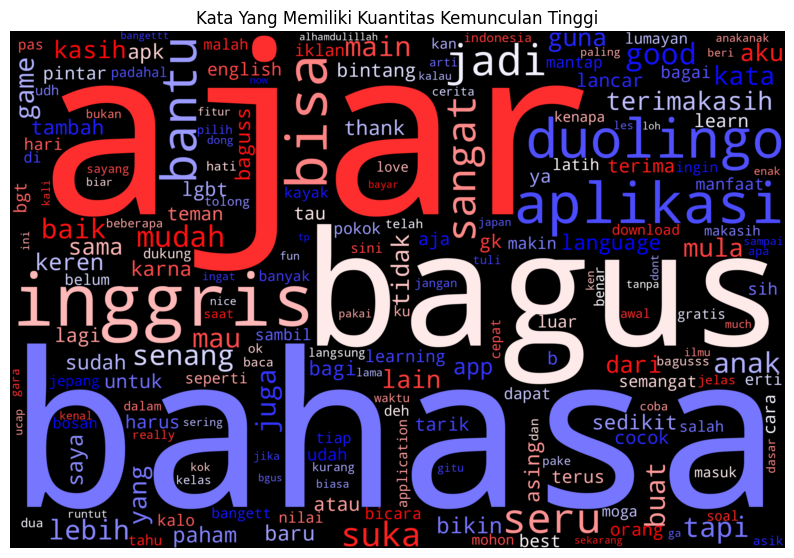

In [46]:
# Visualisasi Kata Yang Memiliki Kuantitas Kemunculan Paling Tinggi

import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title('Kata Yang Memiliki Kuantitas Kemunculan Tinggi')
    plt.axis('off')
    plt.show()

# Memfilter hanya data string yang valid
all_words = ' '.join([str(reviews) for reviews in df_values['stemming'] if isinstance(reviews, str)])

# Membuat WordCloud
wordcloud = WordCloud(width=3000,
                      height=2000,
                      random_state=3,
                      background_color='black',
                      colormap='bwr',
                      collocations=False,
                      stopwords=STOPWORDS).generate(all_words)

# Menampilkan WordCloud
plot_cloud(wordcloud)


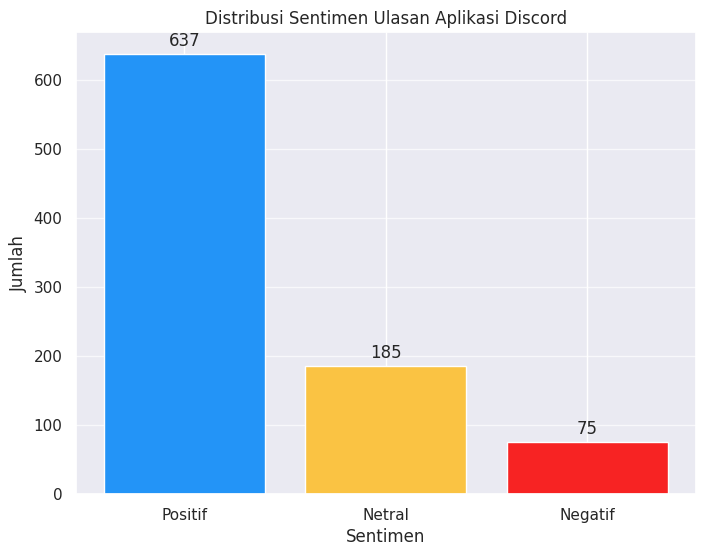

In [47]:
# Visualisasi Distribusi Sentimen Positif , Negatif , Netral Bar Plot

import seaborn as sns

sns.set_theme()

labels = ['Positif', 'Netral', 'Negatif']
counts = [total_positif, total_netral, total_negatif]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8,6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#fac343', '#f72323'])

    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

    ax.grid(axis='y', linestyle='-', alpha=0.7)

    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi Discord")

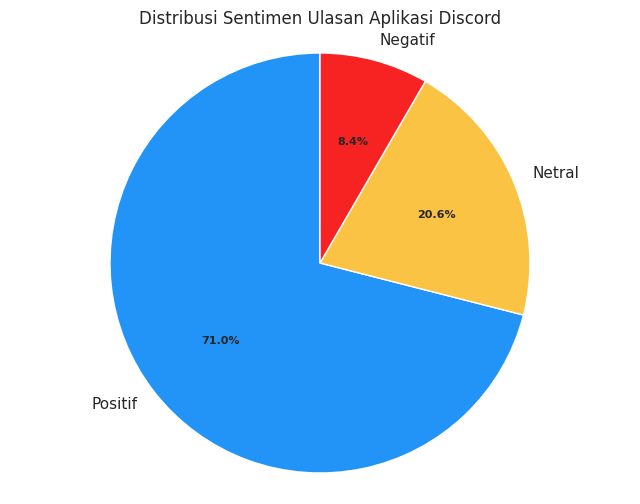

In [48]:
# Visualisasi Distribusi Sentimen Positif , Negatif , Netral Pie Chart

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

labels = ['Positif', 'Netral', 'Negatif']
counts = [total_positif, total_netral, total_negatif]

def show_pie_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8, 6))

    # Customize colors for each wedge
    colors = ['#2394f7', '#fac343', '#f72323']

    # Create the pie chart
    wedges, texts, autotexts = ax.pie(counts, labels=labels, autopct='%1.1f%%',
                                      startangle=90, colors=colors)

    # Customize the wedge properties
    ax.axis('equal')  # Equal aspect ratio ensures a circular pie chart
    plt.setp(autotexts, size=8, weight='bold')

    # Add a title
    ax.set_title(title)

    plt.show()

# Call the pie chart function
show_pie_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi Discord")

In [49]:
# Replace Data Sentimen

df_final = df_values.replace({'Positif':0, 'Netral':1, 'Negatif':2})
df_final

,content,cleaning,normalization,stopwords,tokenized,stemming,translate,sentimen,polaritas
0,sangat mudah dan sangat luar biasa untuk di pe...,sangat mudah dan sangat luar biasa untuk di pe...,sangat mudah dan sangat luar biasa untuk di pe...,mudah sangat luar biasa di pelajari,"['mudah', 'sangat', 'luar', 'biasa', 'di', 'pe...",mudah sangat luar biasa di ajar,very easy to teach,0,0.563333
1,aplikasi yg sangat bagus dan banyak membantu,aplikasi yg sangat bagus dan banyak membantu,aplikasi yang sangat bagus dan banyak membantu,aplikasi sangat bagus banyak membantu,"['aplikasi', 'sangat', 'bagus', 'banyak', 'mem...",aplikasi sangat bagus banyak bantu,"very good application, helps a lot",0,0.910000
2,BAGUS BANGET. AKU YANG AWALNYA PINTER BAHASA I...,bagus banget aku yang awalnya pinter bahasa in...,bagus banget aku yang awalnya pinter bahasa in...,bagus aku awalnya pinter bahasa inggris jadi t...,"['bagus', 'aku', 'awalnya', 'pinter', 'bahasa'...",bagus aku awal pinter bahasa inggris jadi tamb...,"good, I was good at English at the beginning, ...",0,0.466667
3,ðð»ðð»ðð»ðð»ok banget,ok banget,ok banget,ok,['ok'],ok,ok,0,0.500000
4,bagÃºs membantu bgtt gambang mengingat bhs ata...,bags membantu bgtt gambang mengingat bhs atau ...,bags membantu bgtt mudah mengingat bahasa atau...,bags membantu bgtt mudah mengingat bahasa atau...,"['bags', 'membantu', 'bgtt', 'mudah', 'menging...",bags bantu bgtt mudah ingat bahasa atau mtk dl...,bags really help to remember languages ​​or ma...,0,0.011111
...,...,...,...,...,...,...,...,...,...
892,rawrr,rawrr,rawrr,rawrr,['rawrr'],rawrr,rawrr,1,0.000000
893,sangat bagus dan mengasah otak,sangat bagus dan mengasah otak,sangat bagus dan mengasah otak,bagus mengasah otak,"['bagus', 'mengasah', 'otak']",bagus asah otak,good brain teaser,0,0.700000
894,bagus sekali sangat membantu dalam belajar bah...,bagus sekali sangat membantu dalam belajar bah...,bagus sekali sangat membantu dalam belajar bah...,bagus sangat membantu belajar bahasa inggris a...,"['bagus', 'sangat', 'membantu', 'belajar', 'ba...",bagus sangat bantu ajar bahasa inggris and l l...,"very good, very helpful in teaching English an...",0,0.370000
895,goodð,good,good,good,['good'],good,good,0,0.700000


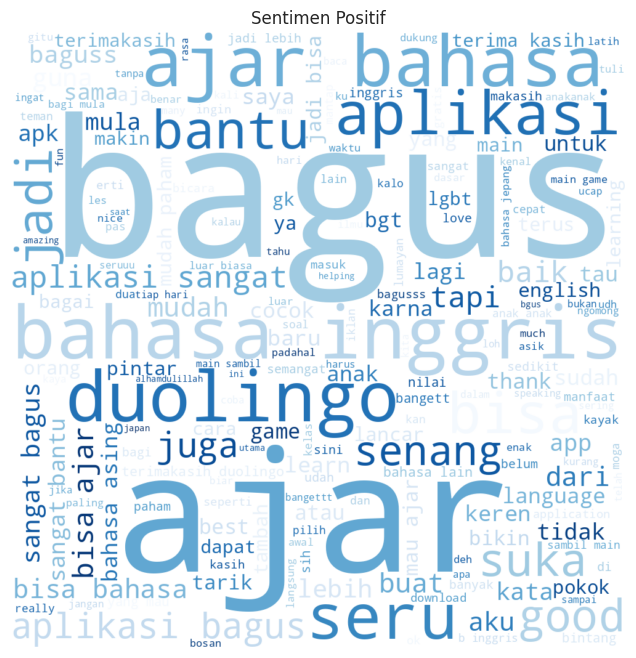

In [50]:
# Visualisasi Wordcould Positif & Negatif

data_positif = df_final[df_final['sentimen'] == 0]
data_netral = df_final[df_final['sentimen'] == 1]
data_negatif = df_final[df_final['sentimen'] == 2]

# Sentimen Positif

all_words = ' '.join([reviews for reviews in data_positif['stemming']])
wordcloud = WordCloud(colormap='Blues', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_words)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Sentimen Positif")
plt.margins(x=0, y=0)
plt.show()

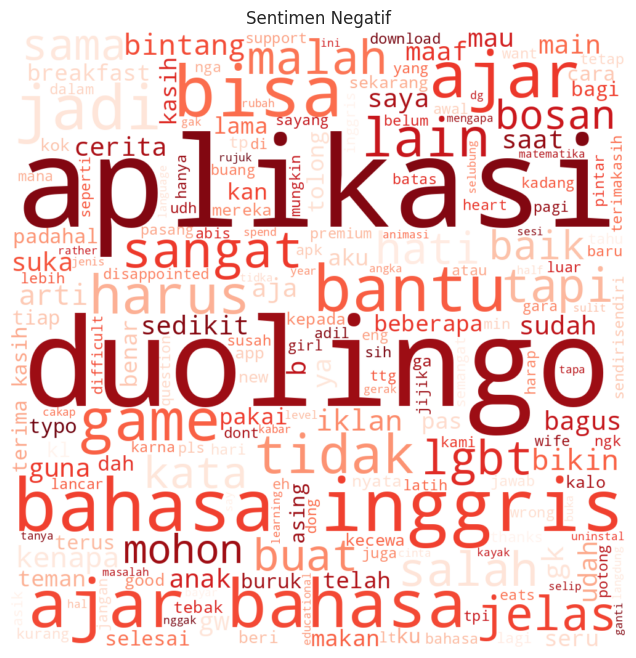

In [51]:
# Sentimen Negatif

all_words = ' '.join([reviews for reviews in data_negatif['stemming']])
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_words)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Sentimen Negatif")
plt.margins(x=0, y=0)
plt.show()

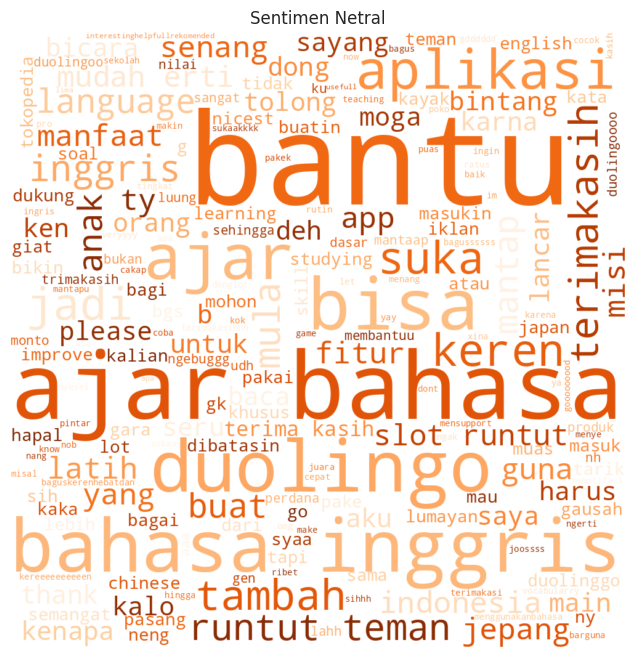

In [52]:
# Sentimen Netral

all_words = ' '.join([str(reviews) for reviews in data_netral['stemming'] if isinstance(reviews, str)])
wordcloud = WordCloud(colormap='Oranges', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_words)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Sentimen Netral")
plt.margins(x=0, y=0)
plt.show()

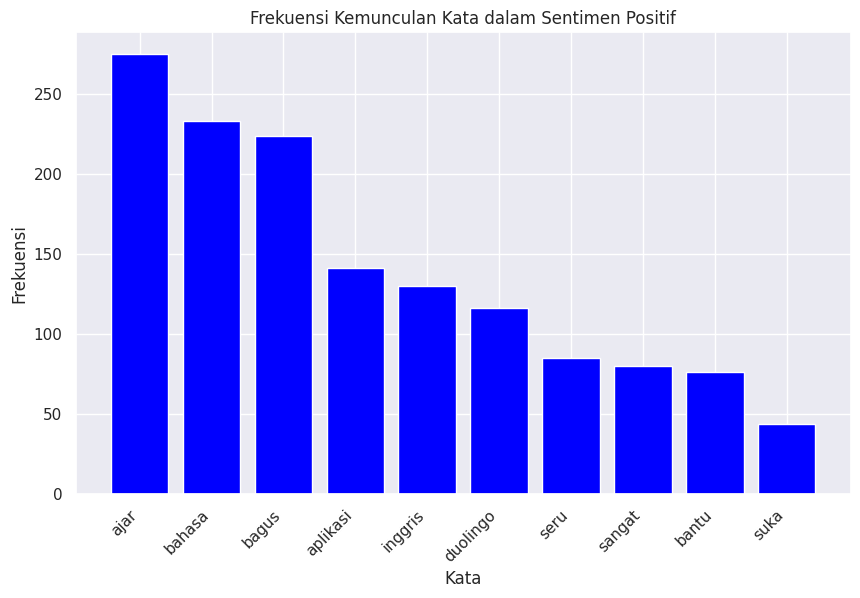

In [53]:
# Frekuensi Kemunculan Kata dalam Sentimen Positif

from collections import Counter
import matplotlib.pyplot as plt

# Daftar kata yang ingin dikecualikan
exclude_words = {"bisa", "tolong", "tapi", "tidak", "padahal", "lagi", "jadi", "sama",
                 "ya", "sudah", "juga", "mau", "udah", "kenapa", "saat", "lebih",
                 "dari", "kalo", "pas", "baru", "aja", "malah", "kasih","masuk"}

# Menggabungkan semua teks dari sentimen positif
all_texts_positif = ' '.join(data_positif['stemming'])

# Menghitung frekuensi kata
word_counts = Counter(all_texts_positif.split())

# Menghapus kata-kata yang ada di daftar exclude_words
filtered_word_counts = {word: count for word, count in word_counts.items() if word not in exclude_words}

# Mengambil 10 kata yang paling sering muncul
most_common_words = Counter(filtered_word_counts).most_common(10)

# Membuat barplot
words, counts = zip(*most_common_words)
plt.figure(figsize=(10, 6))
plt.bar(words, counts, color='blue')
plt.xlabel('Kata')
plt.ylabel('Frekuensi')
plt.title('Frekuensi Kemunculan Kata dalam Sentimen Positif')
plt.xticks(rotation=45, ha='right')
plt.show()


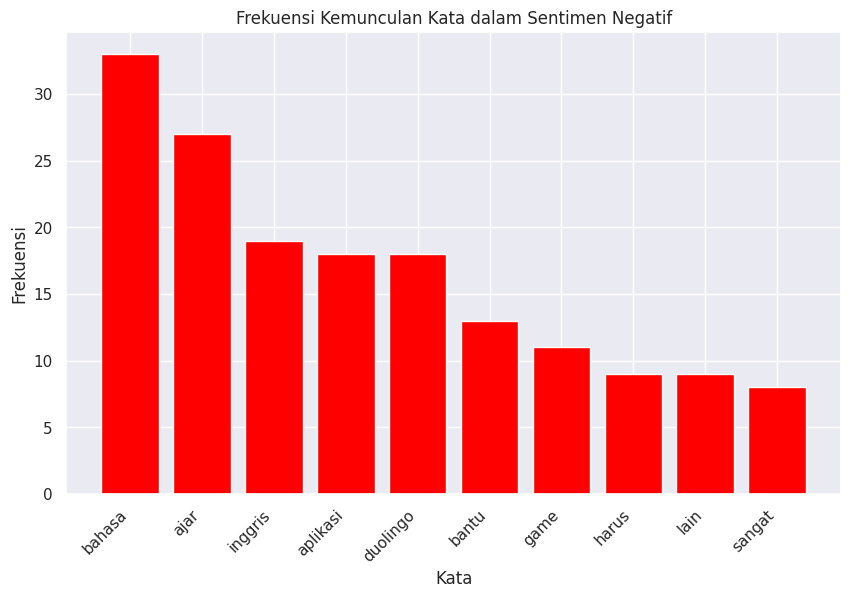

In [54]:
# Frekuensi Kemunculan Kata dalam Sentimen Negatif

from collections import Counter
import matplotlib.pyplot as plt

# Daftar kata yang ingin dikecualikan
exclude_words = {"bisa", "tolong", "tapi", "tidak", "padahal", "lagi", "jadi", "sama",
                 "ya", "sudah", "juga", "mau", "udah", "kenapa", "saat", "lebih",
                 "dari", "kalo", "pas", "baru", "aja", "malah", "kasih", "masuk", "gk", "terus", "udh", "baik"}

# Menggabungkan semua teks dari sentimen negatif
all_texts_positif = ' '.join(data_negatif['stemming'])

# Menghitung frekuensi kata
word_counts = Counter(all_texts_positif.split())

# Menghapus kata-kata yang ada di daftar exclude_words
filtered_word_counts = {word: count for word, count in word_counts.items() if word not in exclude_words}

# Mengambil 10 kata yang paling sering muncul
most_common_words = Counter(filtered_word_counts).most_common(10)

# Membuat barplot
words, counts = zip(*most_common_words)
plt.figure(figsize=(10, 6))
plt.bar(words, counts, color='red')
plt.xlabel('Kata')
plt.ylabel('Frekuensi')
plt.title('Frekuensi Kemunculan Kata dalam Sentimen Negatif')
plt.xticks(rotation=45, ha='right')
plt.show()


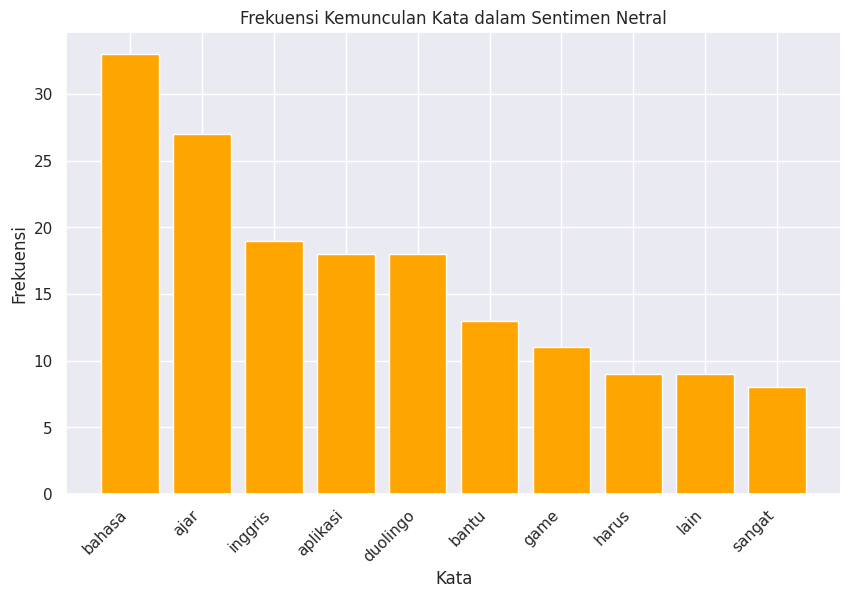

In [55]:
# Frekuensi Kemunculan Kata dalam Sentimen Netral

from collections import Counter
import matplotlib.pyplot as plt

# Daftar kata yang ingin dikecualikan
exclude_words = {"bisa", "tolong", "tapi", "tidak", "padahal", "lagi", "jadi", "sama",
                 "ya", "sudah", "juga", "mau", "udah", "kenapa", "saat", "lebih",
                 "dari", "kalo", "pas", "baru", "aja", "malah", "kasih", "masuk", "gk", "terus", "udh", "baik",
                 "kok", "mohon", "telah"}

# Memfilter data yang valid (hanya string)
all_texts_netral = ' '.join([str(text) for text in data_netral['stemming'] if isinstance(text, str)])

# Menghitung frekuensi kata
word_counts = Counter(all_texts_positif.split())

# Menghapus kata-kata yang ada di daftar exclude_words
filtered_word_counts = {word: count for word, count in word_counts.items() if word not in exclude_words}

# Mengambil 10 kata yang paling sering muncul
most_common_words = Counter(filtered_word_counts).most_common(10)

# Membuat barplot
words, counts = zip(*most_common_words)
plt.figure(figsize=(10, 6))
plt.bar(words, counts, color='orange')
plt.xlabel('Kata')
plt.ylabel('Frekuensi')
plt.title('Frekuensi Kemunculan Kata dalam Sentimen Netral')
plt.xticks(rotation=45, ha='right')
plt.show()


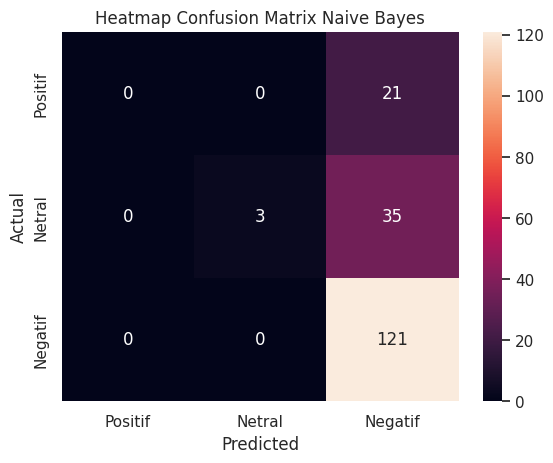

In [56]:
# Visualisasi Heatmap Confusion Matrix

cm_matrix = pd.DataFrame(data=cmnb, columns=['Positif', 'Netral', 'Negatif'],
                         index=['Positif', 'Netral', 'Negatif'])

sns.heatmap(cm_matrix, annot=True, fmt='d')

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Heatmap Confusion Matrix Naive Bayes')
plt.show()

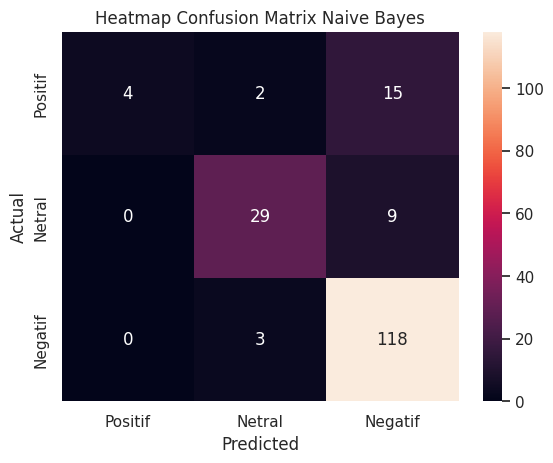

In [57]:
# Visualisasi Heatmap Confusion Matrix

cm_matrix = pd.DataFrame(data=cmsvm, columns=['Positif', 'Netral', 'Negatif'],
                         index=['Positif', 'Netral', 'Negatif'])

sns.heatmap(cm_matrix, annot=True, fmt='d')

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Heatmap Confusion Matrix Naive Bayes')
plt.show()

# **Simpan Model dan Vectorizer Ke Pickle**

In [ ]:
import joblib

# Simpan model Naive Bayes
joblib.dump(svm_model, 'support_vector_machine_model_6.pkl')

# Simpan TF-IDF Vectorizer
joblib.dump(vectorizer, 'tfidf_vectorizer_6.pkl')

print("Model dan vectorizer berhasil disimpan!")


Model dan vectorizer berhasil disimpan!


In [ ]:
# Cek versi library yang digunakan
import sys
import numpy as np
import pandas as pd
import sklearn
import matplotlib
import seaborn

print(f"Python version: {sys.version}")
print(f"NumPy version: {np.__version__}")
print(f"Pandas version: {pd.__version__}")
print(f"Scikit-learn version: {sklearn.__version__}")
print(f"Matplotlib version: {matplotlib.__version__}")
print(f"Seaborn version: {seaborn.__version__}")

Python version: 3.10.12 (main, Sep 11 2024, 15:47:36) [GCC 11.4.0]
NumPy version: 1.26.4
Pandas version: 2.2.2
Scikit-learn version: 1.5.2
Matplotlib version: 3.7.1
Seaborn version: 0.13.2
